<a href="https://colab.research.google.com/github/rinkeshdas01/GRIP-The-Sparks-Foundation/blob/main/IRIS_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-2 IRIS Data Classification using Unsupervised ML

## By- Rinkesh Das

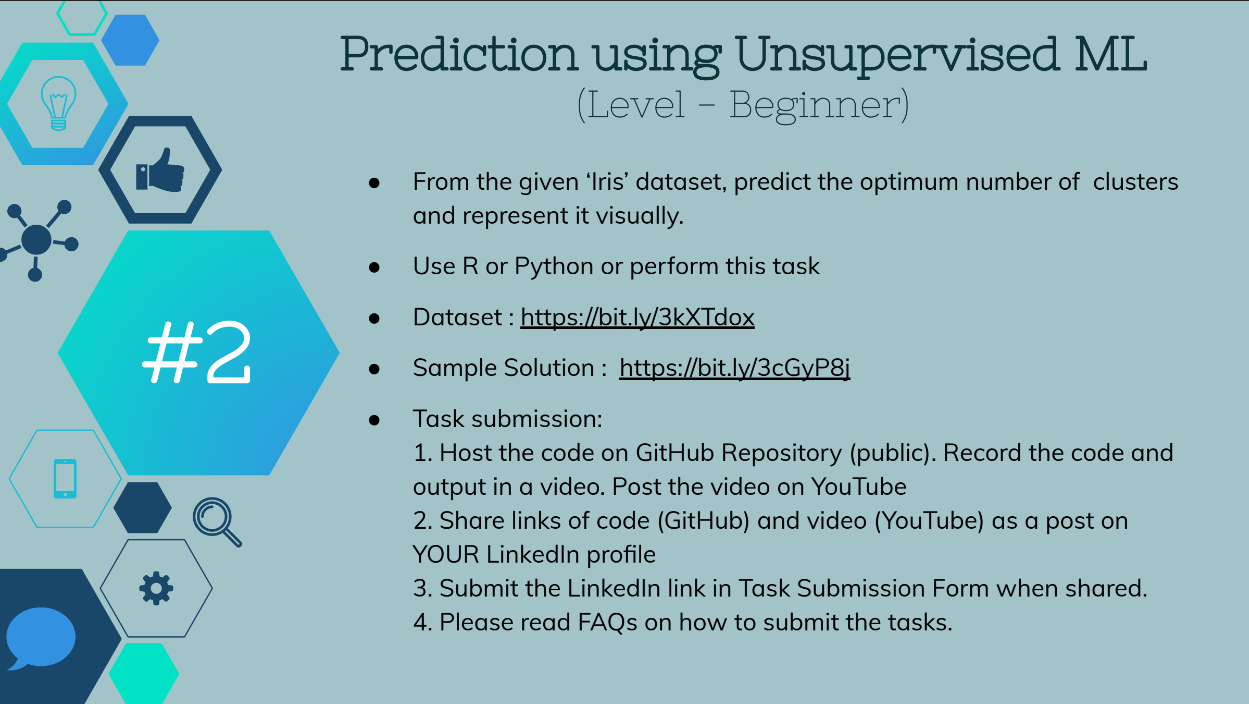

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/OASIS/Iris.csv'

In [ ]:
df=pd.read_csv(path)

# Data Exploration

In [ ]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Checking for null values
df.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
df1=df.copy()

### EDA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


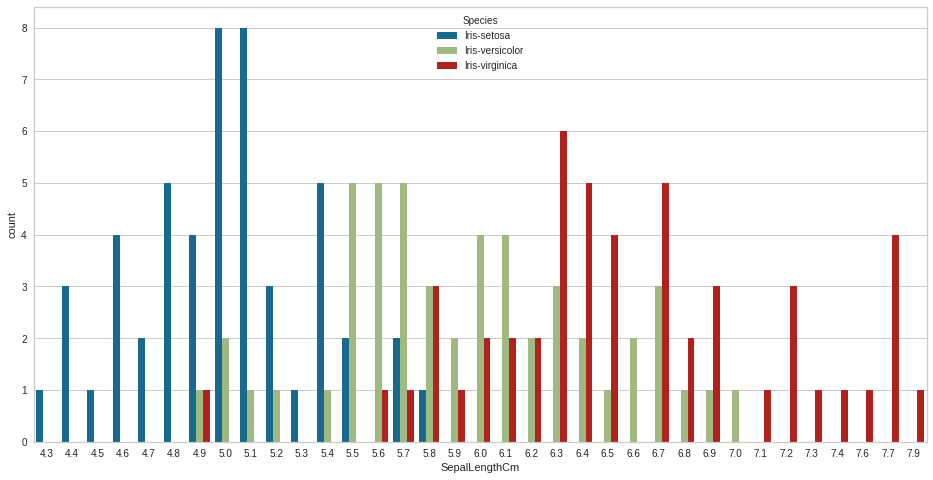

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


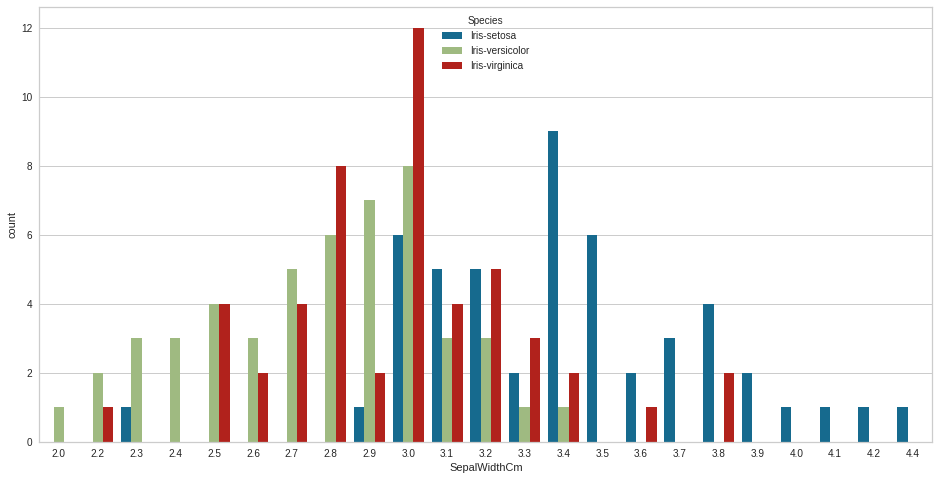

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


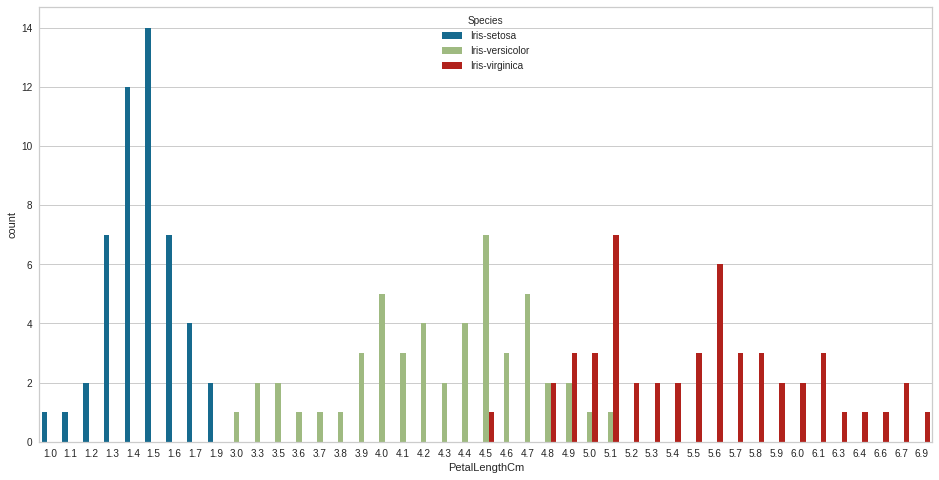

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


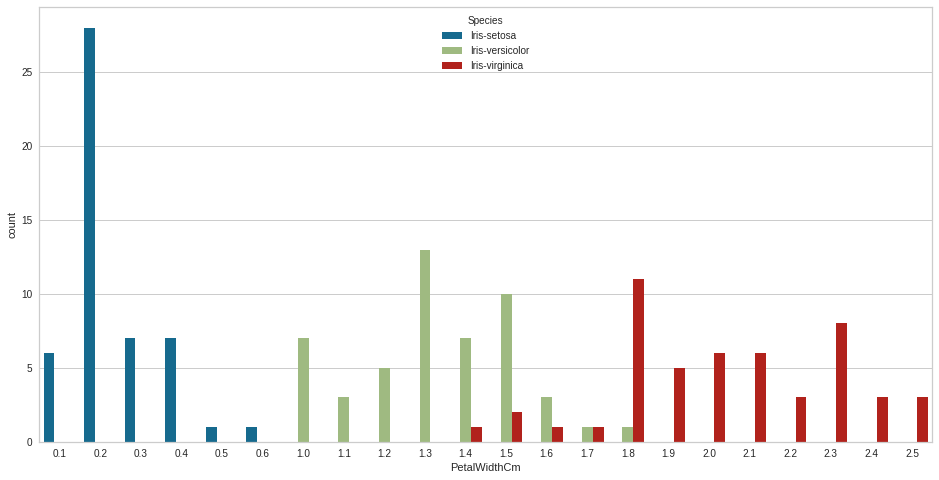

In [ ]:

for i in df.columns[1:-1]:
  plt.figure(figsize=(16,8))
  sns.countplot(df[i],hue=df['Species'])
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

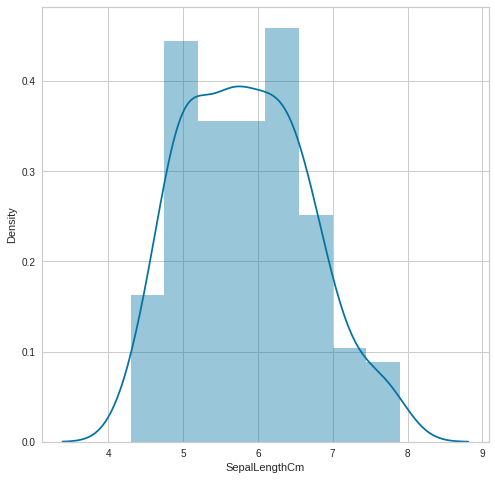

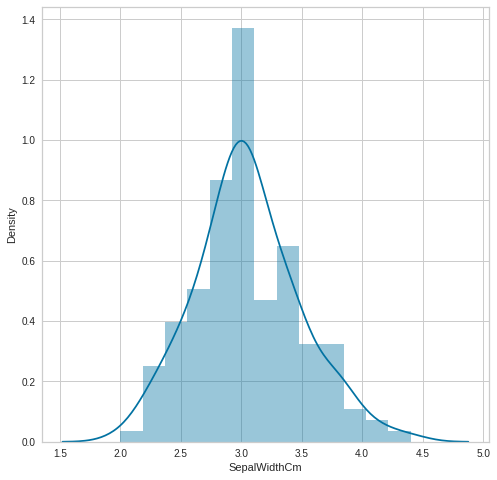

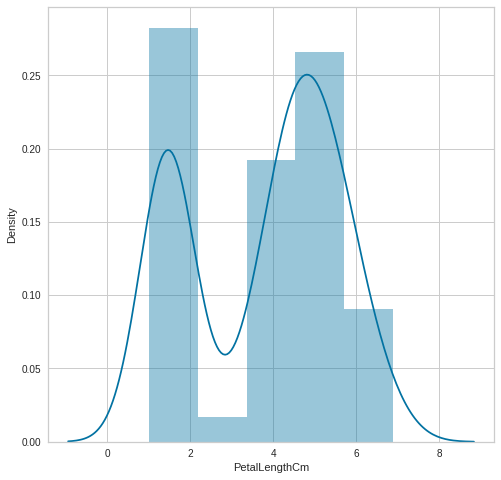

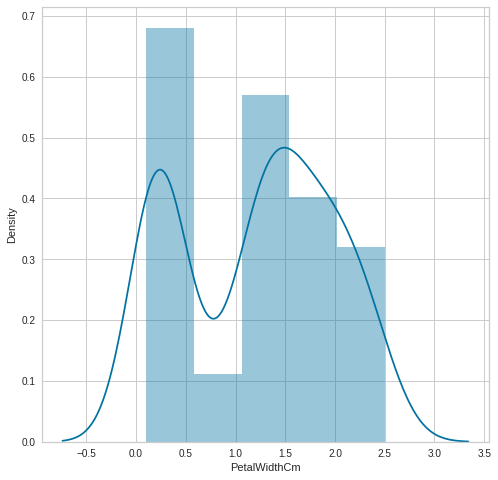

In [ ]:
for i in new_df.columns:
  plt.figure(figsize=(8,8))
  sns.distplot(df[i],kde=True)

In [ ]:
#Standardizing and Normalizing the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
sc=StandardScaler()
nm=Normalizer()
x=df.drop(['Id','Species'],axis=1)
x=sc.fit_transform(x)



In [ ]:
x_nm=nm.fit_transform(x)

In [ ]:
new_df=pd.DataFrame(x_nm,columns=df.columns[1:-1])

In [ ]:
new_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
#Importing the metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score as db, calinski_harabasz_score as ch

In [ ]:
#Defining a function for cluster statistics and distribution of customers in the clusters.
def cluster_stats(model, data, data_scaled):
    df2 = data_scaled.copy()
    df2['Cluster'] = pd.Series(model, name= 'Cluster', index= data_scaled.index)
    
    cluster_stats = df2.groupby('Cluster').agg({'SepalLengthCm': ['min', 'mean','max'],
                                       'SepalWidthCm': ['min', 'mean','max'],
                                       'PetalLengthCm': ['min', 'mean','max'],
                                       'PetalWidthCm': ['min', 'mean','max']}).copy().round(1)
    return cluster_stats, df2

In [ ]:
#Defining a function to obeserve the data distribution among the clusters
def clusters_distribution(df2, data):
    columns = {'#flowers':[]}
    indx =[]
    for i in np.sort(df2.Cluster.unique()):
        columns['#flowers'].append(data.iloc[df2.loc[df2.Cluster == i].index].shape[0])
        
        indx.append('Cluster{}'.format(i))
    
    # Synthesis a data frame for cluster summanry
    clusters_distribution = pd.DataFrame(data= columns, index = indx)

    clusters_distribution['%flowers'] = (clusters_distribution['#flowers']/df2.shape[0])*100
    
    columnsOrder = ['#flowers', '%flowers']
    return clusters_distribution.reindex(columns=columnsOrder) 

### Model Training and Evaluation

### KMeans with Elbow method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Elbow method
from sklearn.cluster import KMeans
wcss=[] 
distortions=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

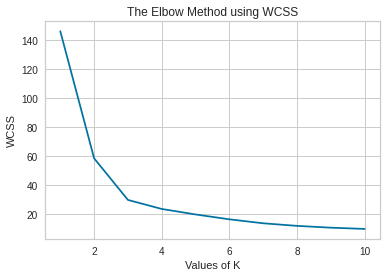

In [ ]:
plt.plot(range(1,11),wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method using WCSS')
plt.show()

In [ ]:
kmeans_elb=KMeans(n_clusters=3,init='k-means++',random_state=42)

label_elb=kmeans_elb.fit_predict(new_df)
label_elb0 = new_df[label_elb == 0]
label_elb1 = new_df[label_elb == 1]
label_elb2 = new_df[label_elb == 2]

In [ ]:
new_df_val=new_df.values

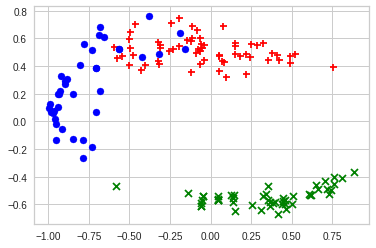

In [ ]:
cols = label_elb0.columns
plt.scatter(label_elb0[cols[1]], label_elb0[cols[2]], color = 'red',marker='+')
plt.scatter(label_elb1[cols[1]], label_elb1[cols[2]], color = 'green',marker='x')
plt.scatter(label_elb2[cols[1]], label_elb2[cols[2]], color = 'blue',marker='o')
plt.show()

In [ ]:
km_elb_ch=ch(new_df,label_elb)
km_elb_db=db(new_df,label_elb)
km_elb_ss=silhouette_score(new_df,label_elb)
km_elb_ch,km_elb_db,km_elb_ss


(286.0245896540708, 0.7390159999502351, 0.5537262628561699)

In [ ]:
cluster_stats(label_elb,df,new_df)[0]

SepalLengthCm           SepalWidthCm           PetalLengthCm       \
                  min mean  max          min mean  max           min mean   
Cluster                                                                     
0                -0.0  0.5  0.9         -0.6 -0.0  0.8           0.3  0.5   
1                -0.7 -0.4 -0.0         -0.6  0.3  0.9          -0.7 -0.5   
2                -0.7 -0.2  0.4         -1.0 -0.8 -0.2          -0.3  0.3   

             PetalWidthCm            
         max          min mean  max  
Cluster                              
0        0.7          0.1  0.5  0.9  
1       -0.4         -0.7 -0.5 -0.3  
2        0.8         -0.3  0.2  0.8

In [ ]:
km_elb_dist=clusters_distribution(cluster_stats(label_elb,df,new_df)[1],df)
km_elb_dist

,#flowers,%flowers
Cluster0,61,40.666667
Cluster1,50,33.333333
Cluster2,39,26.000000


Text(0.5, 1.0, 'Distribution Of Flowers with KMeans')

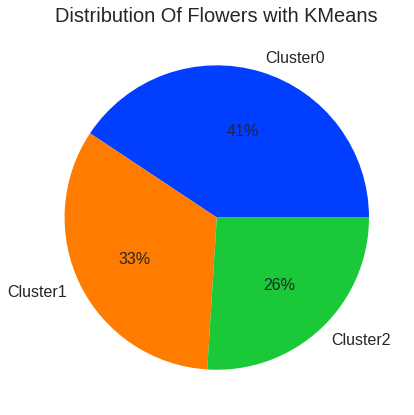

In [ ]:
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(km_elb_dist['%flowers'], labels=km_elb_dist.index, autopct='%.0f%%',colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Flowers with KMeans',size=20)

In [ ]:
km_elb_dist.index

Index(['Cluster0', 'Cluster1', 'Cluster2'], dtype='object')

### KMeans with Silhouette method

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

For n_clusters = 2 The average silhouette_score is : 0.5602680862172367


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


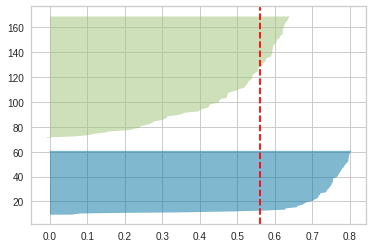

For n_clusters = 3 The average silhouette_score is : 0.5537262628561699


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


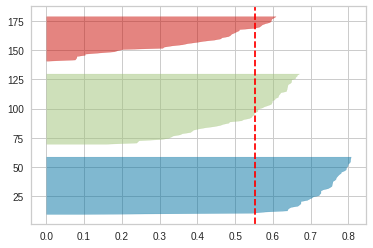

For n_clusters = 4 The average silhouette_score is : 0.4774370564394666


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


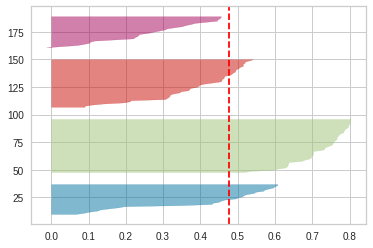

For n_clusters = 5 The average silhouette_score is : 0.40170206908704426


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


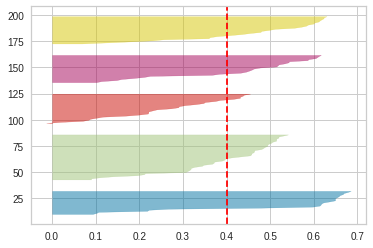

For n_clusters = 6 The average silhouette_score is : 0.391685144906214


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


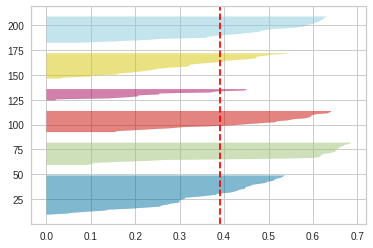

For n_clusters = 7 The average silhouette_score is : 0.38510870051519874


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


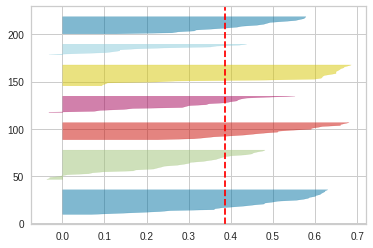

In [ ]:
clusters=range(2,8)
for i in clusters:
  clusterer = KMeans(n_clusters=i,init='k-means++', random_state=10)
  
  cluster_labels = clusterer.fit_predict(new_df)
  silhouette_avg = silhouette_score(new_df, cluster_labels)
  print("For n_clusters =",i,"The average silhouette_score is :", silhouette_avg)
  visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
  visualizer.fit(new_df)
  plt.show()

In [ ]:
kmeans_ss=KMeans(n_clusters=2,init='k-means++',random_state=42)

label_ss=kmeans_ss.fit_predict(new_df)
label_ss0 = new_df[label_elb == 0]
label_ss1 = new_df[label_elb == 1]


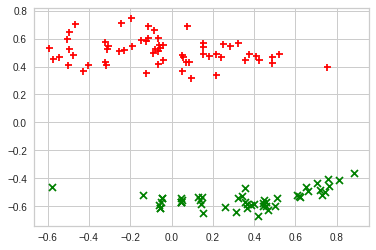

In [ ]:
cols = label_ss0.columns
plt.scatter(label_ss0[cols[1]], label_ss0[cols[2]], color = 'red',marker='+')
plt.scatter(label_ss1[cols[1]], label_ss1[cols[2]], color = 'green',marker='x')

plt.show()

In [ ]:
km_ss_ch=ch(new_df,label_ss)
km_ss_db=db(new_df,label_ss)
km_ss_ss=silhouette_score(new_df,label_ss)
km_ss_ch,km_ss_db,km_ss_ss


(221.39402631964595, 0.640253097039502, 0.5602680862172367)

In [ ]:
cluster_stats(label_ss,df,new_df)[0]

SepalLengthCm           SepalWidthCm           PetalLengthCm       \
                  min mean  max          min mean  max           min mean   
Cluster                                                                     
0                -0.7  0.3  0.9         -1.0 -0.3  0.8          -0.2  0.4   
1                -0.7 -0.4 -0.0         -0.8  0.3  0.9          -0.7 -0.5   

             PetalWidthCm            
         max          min mean  max  
Cluster                              
0        0.8         -0.3  0.4  0.9  
1       -0.1         -0.7 -0.5 -0.1

In [ ]:
km_ss_dist=clusters_distribution(cluster_stats(label_ss,df,new_df)[1],df)
km_ss_dist

,#flowers,%flowers
Cluster0,98,65.333333
Cluster1,52,34.666667


Text(0.5, 1.0, 'Distribution Of Flowers with KMeans Silhouette')

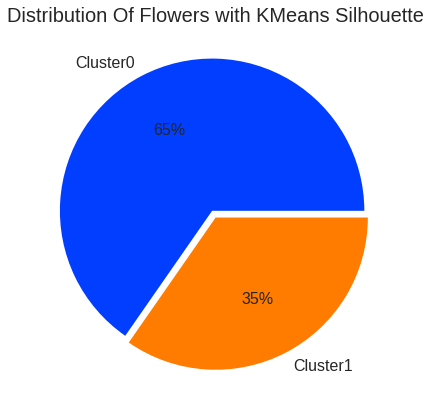

In [ ]:
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(km_ss_dist['%flowers'], labels=km_ss_dist.index, autopct='%.0f%%',explode=(0.05,0),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Flowers with KMeans Silhouette',size=20)

### Agglomerative Clustering

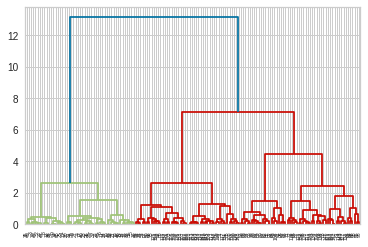

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree
linkage_data = linkage(new_df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
label_ac=model.fit_predict(new_df)

In [ ]:
label_0ac = new_df[label_ac == 0]
label_1ac = new_df[label_ac == 1]

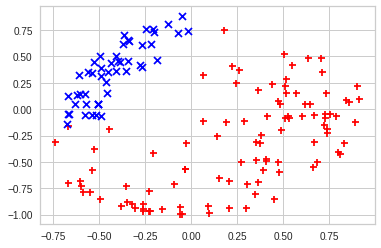

In [ ]:
cols = label_0ac.columns
plt.scatter(label_0ac[cols[0]], label_0ac[cols[1]], color = 'red',marker='+')
plt.scatter(label_1ac[cols[0]], label_1ac[cols[1]], color = 'blue',marker='x')
plt.show()

In [ ]:
ac_ch=ch(new_df,label_ac)
ac_db=db(new_df,label_ac)
ac_ss=silhouette_score(new_df,label_ac)
ac_ch,ac_db,ac_ss

(214.21296382538412, 0.6162421179219574, 0.5613513031427263)

In [ ]:
cluster_stats(label_ac,df,new_df)[0]

SepalLengthCm           SepalWidthCm           PetalLengthCm       \
                  min mean  max          min mean  max           min mean   
Cluster                                                                     
0                -0.7  0.2  0.9         -1.0 -0.3  0.8          -0.5  0.4   
1                -0.7 -0.4 -0.0         -0.1  0.4  0.9          -0.7 -0.5   

             PetalWidthCm            
         max          min mean  max  
Cluster                              
0        0.8         -0.4  0.4  0.9  
1       -0.4         -0.7 -0.5 -0.3

In [ ]:
ac_dist=clusters_distribution(cluster_stats(label_ac,df,new_df)[1],df)
ac_dist

,#flowers,%flowers
Cluster0,101,67.333333
Cluster1,49,32.666667


Text(0.5, 1.0, 'Distribution Of Flowers with Agglomerative Clustering')

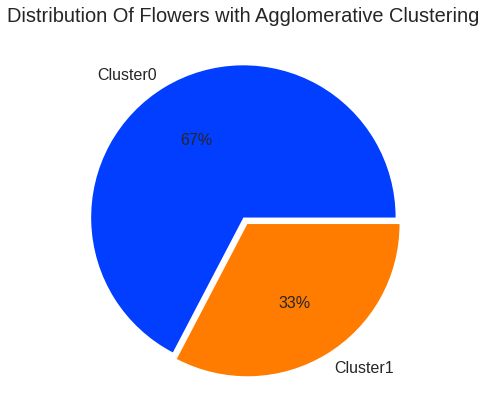

In [ ]:
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(ac_dist['%flowers'], labels=ac_dist.index, autopct='%.0f%%',explode=(0,0.05),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Flowers with Agglomerative Clustering',size=20)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.4, min_samples = 20).fit_predict(new_df) # fitting the model


In [ ]:
np.unique(dbscan)

array([-1,  0,  1])

In [ ]:
label_0db = new_df[dbscan == 0]
label_1db = new_df[dbscan == -1]
label_2db=new_df[dbscan==1]

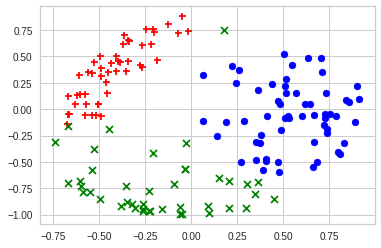

In [ ]:
cols = label_0db.columns
plt.scatter(label_0db[cols[0]], label_0db[cols[1]], color = 'red',marker='+')
plt.scatter(label_1db[cols[0]], label_1db[cols[1]], color = 'green',marker='x')
plt.scatter(label_2db[cols[0]], label_2db[cols[1]], color = 'blue',marker='o')

plt.show()

In [ ]:
db_ch=ch(new_df,dbscan)
db_db=db(new_df,dbscan)
db_ss=silhouette_score(new_df,dbscan)
db_ch,db_db,db_ss

(263.9943045288442, 0.7899269467022177, 0.5414894206734815)

In [ ]:
cluster_stats(dbscan,df,new_df)[0]

SepalLengthCm           SepalWidthCm           PetalLengthCm       \
                  min mean  max          min mean  max           min mean   
Cluster                                                                     
-1               -0.7 -0.2  0.4         -1.0 -0.7  0.8          -0.5  0.2   
 0               -0.7 -0.4 -0.0         -0.1  0.4  0.9          -0.7 -0.5   
 1                0.1  0.5  0.9         -0.6 -0.1  0.5           0.3  0.5   

             PetalWidthCm            
         max          min mean  max  
Cluster                              
-1       0.8         -0.4  0.2  0.9  
 0      -0.4         -0.7 -0.5 -0.3  
 1       0.7          0.1  0.5  0.8

In [ ]:
db_dist=clusters_distribution(cluster_stats(dbscan,df,new_df)[1],df)
db_dist

,#flowers,%flowers
Cluster-1,42,28.000000
Cluster0,49,32.666667
Cluster1,59,39.333333


Text(0.5, 1.0, 'Distribution Of Flowers with DBSCAN')

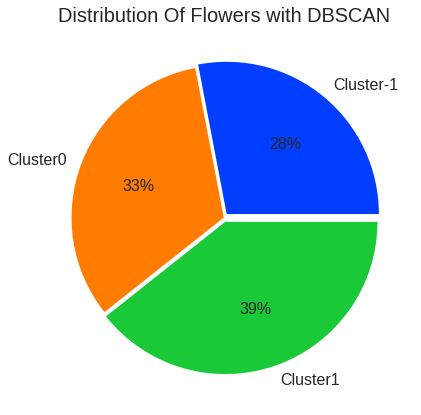

In [ ]:
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(db_dist['%flowers'], labels=db_dist.index, autopct='%.0f%%',explode=(0.03,0,0.03),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Flowers with DBSCAN',size=20)

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
spec_c=SpectralClustering(n_clusters=3,random_state=42,n_neighbors=20)
label_sc=spec_c.fit_predict(new_df)

In [ ]:
label_0sc = new_df[label_sc == 0]
label_1sc = new_df[label_sc == 1]
label_2sc = new_df[label_sc == 2]

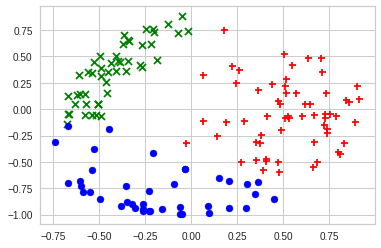

In [ ]:
cols = label_0sc.columns
plt.scatter(label_0sc[cols[0]], label_0sc[cols[1]], color = 'red',marker='+')
plt.scatter(label_1sc[cols[0]], label_1sc[cols[1]], color = 'green',marker='x')
plt.scatter(label_2sc[cols[0]], label_2sc[cols[1]], color = 'blue',marker='o')
plt.show()

In [ ]:
sc_ch=ch(new_df,label_sc)
sc_db=db(new_df,label_sc)
sc_ss=silhouette_score(new_df,label_sc)
sc_ch,sc_db,sc_ss

(285.15324129573895, 0.7400151095311832, 0.5541410688434013)

In [ ]:
cluster_stats(label_sc,df,new_df)[0]

SepalLengthCm           SepalWidthCm           PetalLengthCm       \
                  min mean  max          min mean  max           min mean   
Cluster                                                                     
0                -0.0  0.5  0.9         -0.6 -0.0  0.8           0.3  0.5   
1                -0.7 -0.4 -0.0         -0.1  0.4  0.9          -0.7 -0.5   
2                -0.7 -0.2  0.4         -1.0 -0.8 -0.2          -0.5  0.2   

             PetalWidthCm            
         max          min mean  max  
Cluster                              
0        0.7          0.1  0.5  0.9  
1       -0.4         -0.7 -0.5 -0.3  
2        0.8         -0.4  0.2  0.8

In [ ]:
sc_dist=clusters_distribution(cluster_stats(label_sc,df,new_df)[1],df)
sc_dist

,#flowers,%flowers
Cluster0,61,40.666667
Cluster1,49,32.666667
Cluster2,40,26.666667


Text(0.5, 1.0, 'Distribution Of Flowers with Spectral Clustering')

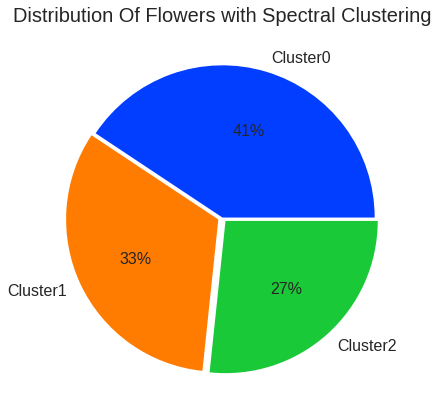

In [ ]:
plt.figure(figsize=(7,7))
colors = sns.color_palette('bright')
plt.pie(sc_dist['%flowers'], labels=sc_dist.index, autopct='%.0f%%',explode=(0,0.03,0.03),colors=colors,textprops={'fontsize': 16})
plt.title('Distribution Of Flowers with Spectral Clustering',size=20)

### Model Summary

In [ ]:

evaluation={'Models':['KMeans Clustering','KMeans 2 clusters','Agglomerative Clustering','DBSCAN','Spectral CLustering'],'Davies Bouldin Score':[km_elb_db,km_ss_db,ac_db,db_db,sc_db],'Calinski Harabasz Score':[km_elb_ch,km_ss_ch,ac_ch,db_ch,sc_ch],'Silhouette Score':[km_elb_ss,km_ss_ss,ac_ss,db_ss,sc_ss]}
eval_df=pd.DataFrame(evaluation)
eval_df

,Models,Davies Bouldin Score,Calinski Harabasz Score,Silhouette Score
0,KMeans Clustering,0.739016,286.024590,0.553726
1,KMeans 2 clusters,0.640253,221.394026,0.560268
2,Agglomerative Clustering,0.616242,214.212964,0.561351
3,DBSCAN,0.789927,263.994305,0.541489
4,Spectral CLustering,0.740015,285.153241,0.554141


From the above metrics and visualization,it is concluded that Agglomerative Clustering is our best model and the optimal number of clusters is 2.